In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, confusion_matrix

from  src.ML_functions import plot_model_metrics, plot_confusion_matrix, cluster_centroids_undersample, visualize_clusters, calculate_silhouette_score
from  src.ML_functions import tomek_links_undersample, random_undersample
from sklearn.model_selection import cross_val_score

from imblearn.under_sampling import TomekLinks

In [2]:
# Load Dataframe

df = pd.read_csv('Preprocessed_Data/Final_df.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,score,thumbsUpCount,accurate,add,ai,also,always,amazing,answer,anything,...,voice,want,way,well,wonderful,work,would,wow,sentiment,text_length
0,5,0.0,0.0,0.0,0.540835,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6369,0.027778
1,5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4404,0.009259
2,5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7096,0.018519
3,1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4215,0.000000
4,4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1372,0.074074


# MODELLING

In [3]:
# Split df

X = df.drop(columns=['score'])
y = df['score'] - 1     # Mapping target column from [1,2,3,4,5] to [0,1,2,3,4]

print(f'Shape for X features set: {X.shape}')
print(f'Shape for y target column: {y.shape}')

Shape for X features set: (134416, 103)
Shape for y target column: (134416,)


In [4]:
# Initialize ML models

models = {
    'RandomForest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1)
    
}

In [5]:
# Initialize Stratified K fold

k = 10

skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

In [6]:
# Dict to save metric evaluation scores

metrics = ['accuracy', 'precision', 'recall', 'f1', 'balanced_accuracy', 'confusion_matrix']

model_metrics = {name : {metric : [] for metric in metrics} for name in models}


In [7]:
# Models training 

for i, (train_index, test_index) in enumerate(skf.split(X, y)):

    print(f'Fold {i+1} evaluating...')

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print('-'*40)
    
    for name, model in models.items():

        print(f'{name} model training...')

        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        model_metrics[name]['accuracy'].append(accuracy_score(y_test, y_pred))
        model_metrics[name]['precision'].append(precision_score(y_test, y_pred, average='weighted'))
        model_metrics[name]['recall'].append(recall_score(y_test, y_pred, average='weighted'))
        model_metrics[name]['f1'].append(f1_score(y_test, y_pred, average='weighted'))
        model_metrics[name]['balanced_accuracy'].append(balanced_accuracy_score(y_test, y_pred))
        model_metrics[name]['confusion_matrix'].append(confusion_matrix(y_test, y_pred))

    print('-'*40)

Fold 1 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...
XGBoost model training...
----------------------------------------
Fold 2 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...


/Users/silvanoquarto/Desktop/PROJECTS/NLP-for-ChatGPT-Reviews/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost model training...
----------------------------------------
Fold 3 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...


/Users/silvanoquarto/Desktop/PROJECTS/NLP-for-ChatGPT-Reviews/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost model training...
----------------------------------------
Fold 4 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...


/Users/silvanoquarto/Desktop/PROJECTS/NLP-for-ChatGPT-Reviews/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost model training...
----------------------------------------
Fold 5 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...


/Users/silvanoquarto/Desktop/PROJECTS/NLP-for-ChatGPT-Reviews/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost model training...
----------------------------------------
Fold 6 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...


/Users/silvanoquarto/Desktop/PROJECTS/NLP-for-ChatGPT-Reviews/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost model training...
----------------------------------------
Fold 7 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...


/Users/silvanoquarto/Desktop/PROJECTS/NLP-for-ChatGPT-Reviews/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost model training...
----------------------------------------
Fold 8 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...


/Users/silvanoquarto/Desktop/PROJECTS/NLP-for-ChatGPT-Reviews/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost model training...
----------------------------------------
Fold 9 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...


/Users/silvanoquarto/Desktop/PROJECTS/NLP-for-ChatGPT-Reviews/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost model training...
----------------------------------------
Fold 10 evaluating...
----------------------------------------
RandomForest model training...
LogisticRegression model training...


/Users/silvanoquarto/Desktop/PROJECTS/NLP-for-ChatGPT-Reviews/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost model training...
----------------------------------------


In [8]:
# Mean and Std for each evaluation metric and model

final_metrics = {name: {metric: (np.mean(scores), np.std(scores)) for metric, scores in metrics_dict.items()} for name, metrics_dict in model_metrics.items()}

for name, metrics_dict in final_metrics.items():

    print(f"\n{name} Performance Metrics:")
    for metric, (mean_score, std_score) in metrics_dict.items():

        if metric.capitalize() == 'Confusion_matrix':
            continue

        print(f"{metric.capitalize()} - Mean: {mean_score:.4f}, Std: {std_score:.4f}")


RandomForest Performance Metrics:
Accuracy - Mean: 0.7599, Std: 0.0016
Precision - Mean: 0.6526, Std: 0.0038
Recall - Mean: 0.7599, Std: 0.0016
F1 - Mean: 0.6914, Std: 0.0017
Balanced_accuracy - Mean: 0.2687, Std: 0.0037

LogisticRegression Performance Metrics:
Accuracy - Mean: 0.7712, Std: 0.0009
Precision - Mean: 0.6701, Std: 0.0327
Recall - Mean: 0.7712, Std: 0.0009
F1 - Mean: 0.6876, Std: 0.0013
Balanced_accuracy - Mean: 0.2552, Std: 0.0031

XGBoost Performance Metrics:
Accuracy - Mean: 0.7735, Std: 0.0012
Precision - Mean: 0.6638, Std: 0.0136
Recall - Mean: 0.7735, Std: 0.0012
F1 - Mean: 0.6940, Std: 0.0016
Balanced_accuracy - Mean: 0.2691, Std: 0.0032


# VISUALIZE RESULTS

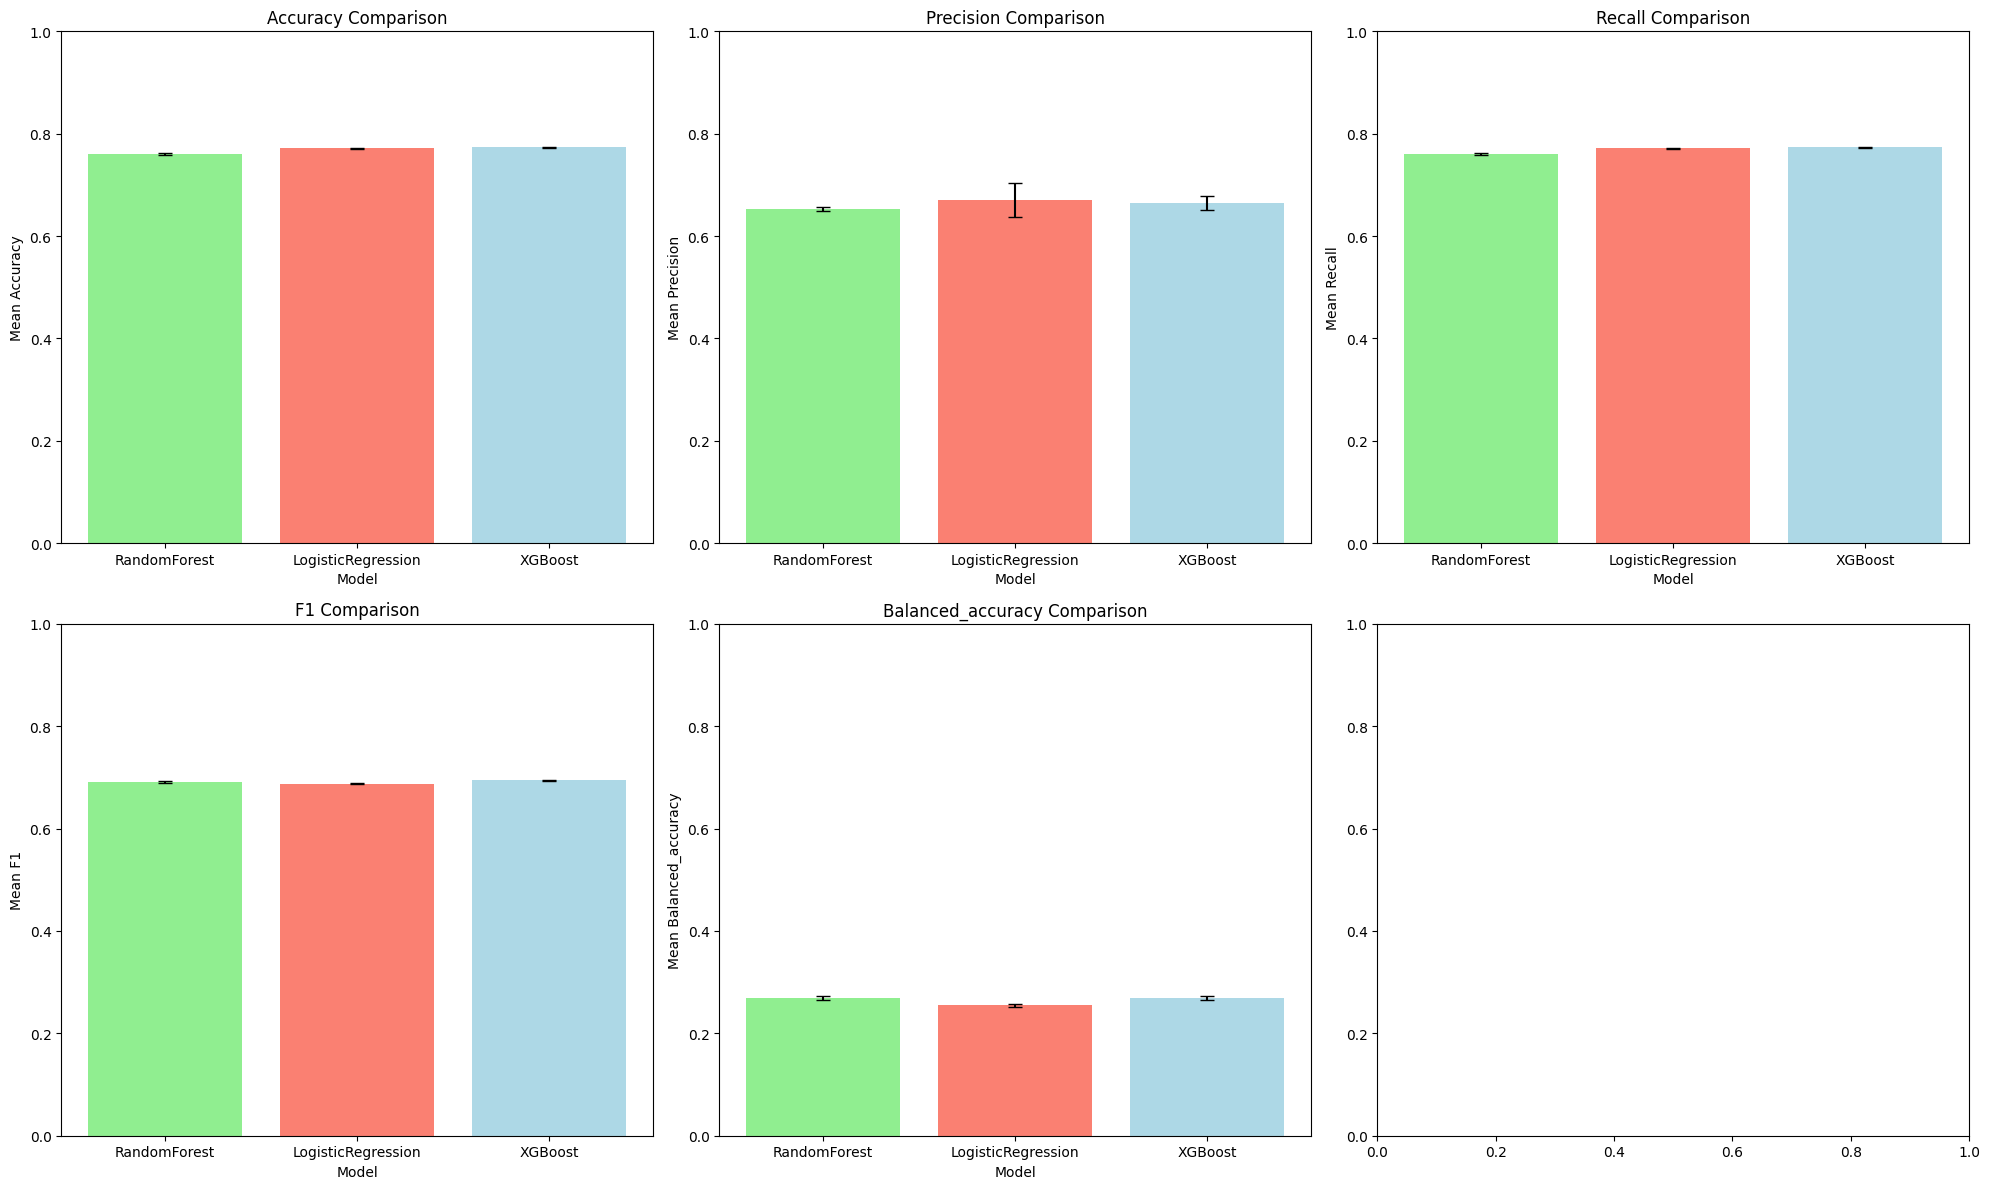

In [9]:
# Visualize and compare models results

plot_model_metrics(model_metrics, models, metrics)


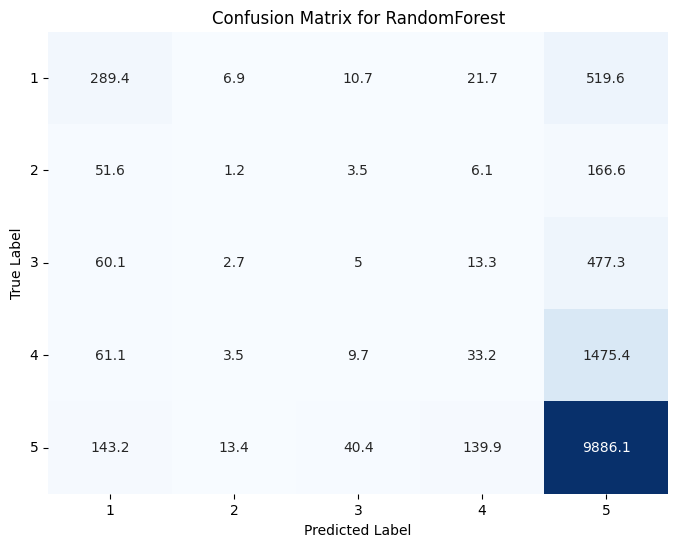

In [11]:
# Plot confusion matrix with mean values for a chosen model

chosen_model = 'RandomForest'

conf_matrix = np.mean(model_metrics[chosen_model]['confusion_matrix'], axis=0)

plot_confusion_matrix(conf_matrix, model_name = chosen_model)

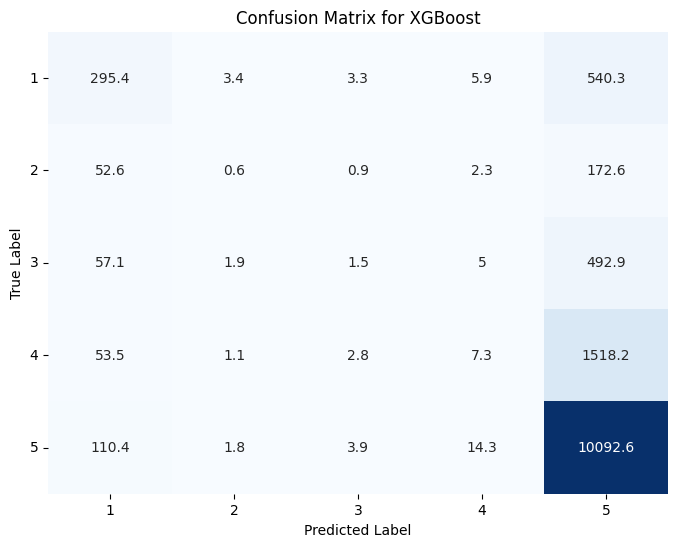

In [22]:
# Plot confusion matrix with mean values for a chosen model

chosen_model = 'XGBoost'

conf_matrix = np.mean(model_metrics[chosen_model]['confusion_matrix'], axis=0)

plot_confusion_matrix(conf_matrix, model_name = chosen_model)

# UNDERSAMPLING APPROACH

## Cluster Centroids Undersampling

In [12]:
# Apply Cluster Centroids Undersampling

X_res_clus, y_res_clus = cluster_centroids_undersample(X, y)

print('New score values distribution:')
y_res_clus.value_counts()

New score values distribution:


score
0    2290
1    2290
2    2290
3    2290
4    2290
Name: count, dtype: int64

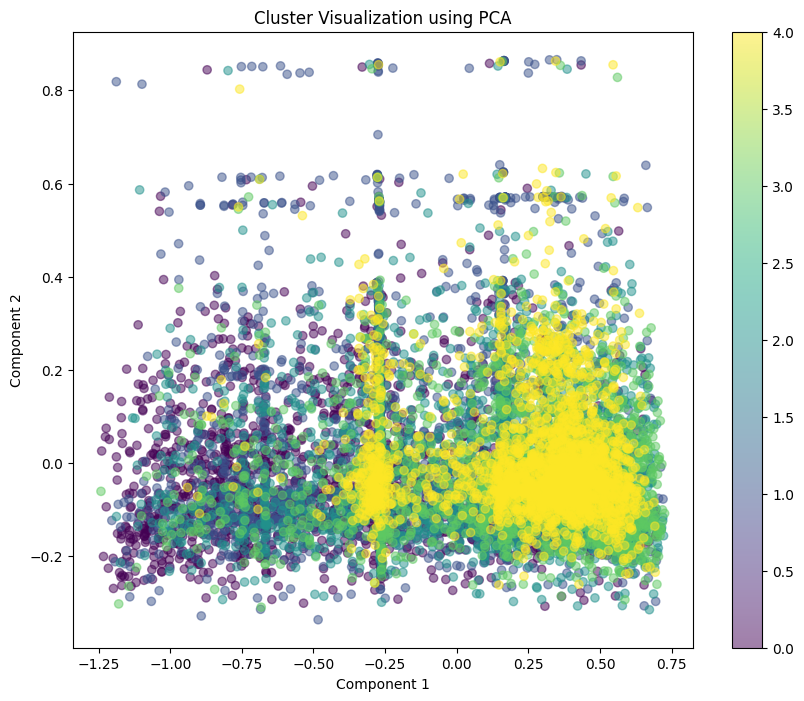

In [13]:
# Visualize the undersampled data with PCA

visualize_clusters(X_res_clus, y_res_clus, method='PCA')

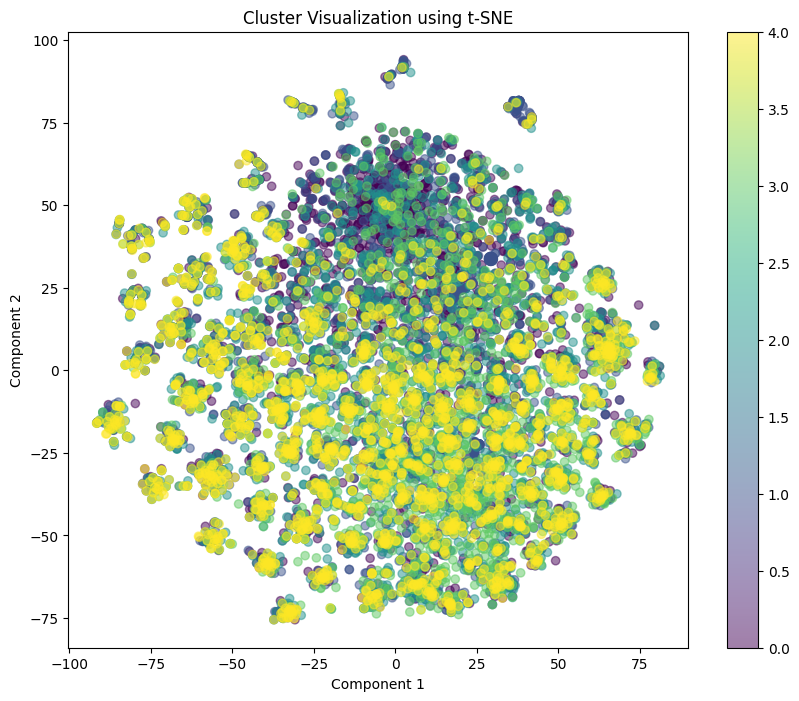

In [14]:
# Visualize the undersampled data with t-SNE

visualize_clusters(X_res_clus, y_res_clus, method='t-SNE')

In [15]:
# Calculate Silhouette Score for the resampled data

sil_score = calculate_silhouette_score(X_res_clus, y_res_clus)

print(f'Silhouette Score: {sil_score:.4f}')

Silhouette Score: -0.0343


In [17]:
# Evaluating Balanced Accuracy in 10-folds cross-validation 

model = models['RandomForest']

scores = cross_val_score(model, X_res_clus, y_res_clus, cv=10, scoring='balanced_accuracy')

print(f'Balanced Accuracy: Mean={scores.mean():.4f}, Std={scores.std():.4f}')

Balanced Accuracy: Mean=0.5405, Std=0.0501


In [18]:
# Evaluating Balanced Accuracy in 10-folds cross-validation 

model = models['XGBoost']

scores = cross_val_score(model, X_res_clus, y_res_clus, cv=10, scoring='balanced_accuracy')

print(f'Balanced Accuracy: Mean={scores.mean():.4f}, Std={scores.std():.4f}')

Balanced Accuracy: Mean=0.6631, Std=0.0636


## Tomek Links UnderSampling

In [19]:
# Applying Tomek Links

X_res_tom, y_res_tom = tomek_links_undersample(X, y)

print('New score values distribution:')
y_res_tom.value_counts()

New score values distribution:


score
4    98312
3    13222
0     7156
2     4548
1     2290
Name: count, dtype: int64

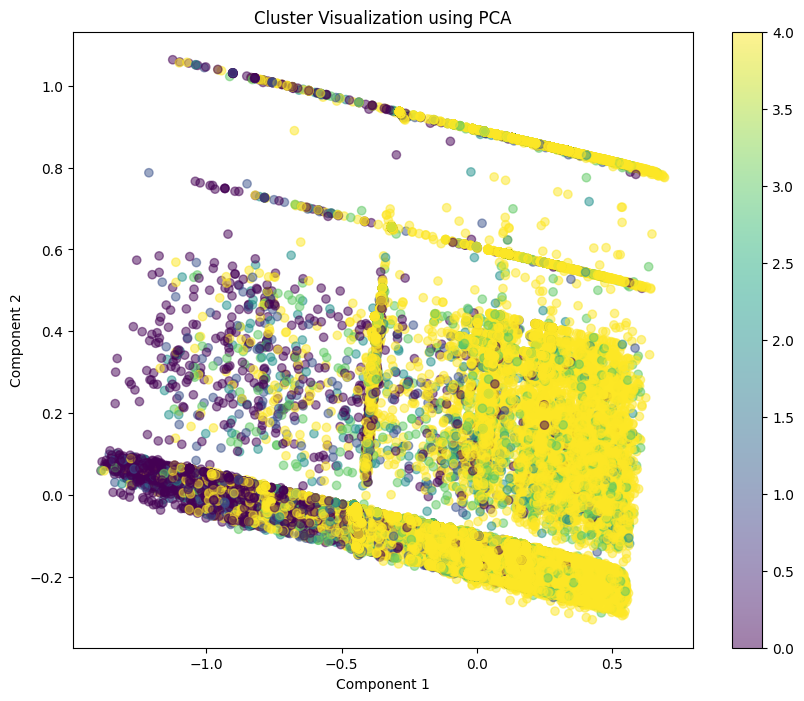

In [20]:
# Visualize the undersampled data with PCA

visualize_clusters(X_res_tom, y_res_tom, method='PCA')

In [21]:
# Evaluate Random Forest performance

model = models['RandomForest']

scores = cross_val_score(model, X_res_tom, y_res_tom, cv=10, scoring='balanced_accuracy')
print(f'Balanced Accuracy: Mean={scores.mean():.4f}, Std={scores.std():.4f}')

Balanced Accuracy: Mean=0.2701, Std=0.0212


In [23]:
# Evaluating Balanced Accuracy in 10-folds cross-validation 

model = models['XGBoost']

scores = cross_val_score(model, X_res_tom, y_res_tom, cv=10, scoring='balanced_accuracy')

print(f'Balanced Accuracy: Mean={scores.mean():.4f}, Std={scores.std():.4f}')

Balanced Accuracy: Mean=0.2692, Std=0.0228


## Random UnderSampling

In [24]:
# Apply Random Undersampling

X_res_rand, y_res_rand = random_undersample(X, y)

print('New score values distribution:')
y_res_rand.value_counts()

New score values distribution:


score
0    2290
1    2290
2    2290
3    2290
4    2290
Name: count, dtype: int64

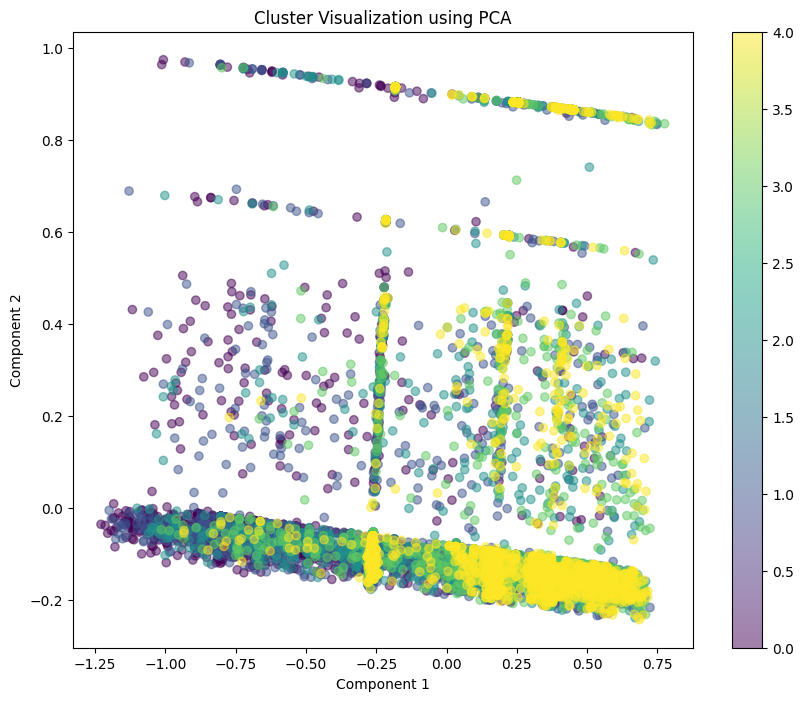

In [25]:
# Visualize the undersampled data with PCA

visualize_clusters(X_res_rand, y_res_rand, method='PCA')

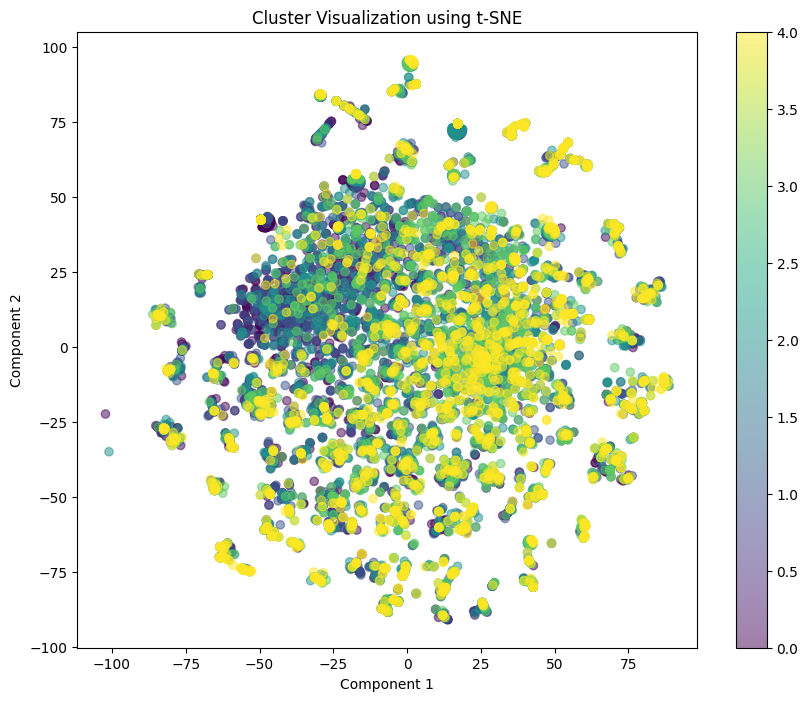

In [26]:
# Visualize the undersampled data with t-SNE

visualize_clusters(X_res_rand, y_res_rand, method='t-SNE')

In [27]:
# Calculate Silhouette Score for the resampled data

sil_score = calculate_silhouette_score(X_res_rand, y_res_rand)

print(f'Silhouette Score: {sil_score:.4f}')

Silhouette Score: -0.0216


In [28]:
# Evaluate Random Forest performance

model = models['RandomForest']

scores = cross_val_score(model, X_res_rand, y_res_rand, cv=10, scoring='balanced_accuracy')
print(f'Balanced Accuracy: Mean={scores.mean():.4f}, Std={scores.std():.4f}')

Balanced Accuracy: Mean=0.3138, Std=0.0219


In [29]:
# Evaluating Balanced Accuracy in 10-folds cross-validation 

model = models['XGBoost']

scores = cross_val_score(model, X_res_rand, y_res_rand, cv=10, scoring='balanced_accuracy')

print(f'Balanced Accuracy: Mean={scores.mean():.4f}, Std={scores.std():.4f}')

Balanced Accuracy: Mean=0.3248, Std=0.0213


# TRAINING MODELS ON THE ENTIRE DATASET AND SAVING THEM

In [63]:
# Load Cleaned df

df_processed = pd.read_csv('Preprocessed_Data/Preprocessed_Content.csv')
df_processed = df_processed[['score', 'cleaned_content']]
df_processed.head()

,score,cleaned_content
0,5,best ai ever red_heart
1,5,good app
2,5,good luck blue_heart
3,1,nice
4,4,not_too much creative really make feel bored r...


In [64]:
# Split df

X = df_processed.drop(columns=['score'])
y = df_processed['score'] - 1     # Mapping target column from [1,2,3,4,5] to [0,1,2,3,4]

print(f'Shape for X features set: {X.shape}')
print(f'Shape for y target column: {y.shape}')

Shape for X features set: (134416, 1)
Shape for y target column: (134416,)


In [67]:
# Training and saving models using only cleaned_content and score

from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
from sklearn.pipeline import make_pipeline

vectorizer = TfidfVectorizer(max_features=100)

for name, model in models.items():

    print('-'*40)

    print(f'{name} model training...')

    content_trasformed = vectorizer.fit_transform(X['cleaned_content'])
    X_train_trasformed = pd.DataFrame(content_trasformed.toarray(), columns=vectorizer.get_feature_names_out())    

    model.fit(X_train_trasformed, y)

    pipe = make_pipeline(vectorizer, model)

    pipe.fit(X['cleaned_content'], y)

    #vectorizer_filename = 'Saved_Vectorizer/Vect_' + name + '.pkl'
    #model_filename = 'Saved_Models/trained_' + name + '.pkl'
    pipeline_filename = 'Saved_Pipeline/trained_vectorizer_' + name + '.pkl'
    
    #joblib.dump(vectorizer, vectorizer_filename)
    #joblib.dump(model, model_filename)
    joblib.dump(pipe, pipeline_filename)

    #print(f'Vectorizer saved!!')
    #print(f'{name} saved!!')
    print(f'Pipeline for {name}: saved!!')

    print('-'*40)

----------------------------------------
RandomForest model training...
Pipeline for RandomForest: saved!!
----------------------------------------
----------------------------------------
LogisticRegression model training...
Pipeline for LogisticRegression: saved!!
----------------------------------------
----------------------------------------
XGBoost model training...
Pipeline for XGBoost: saved!!
----------------------------------------
